<a href="https://colab.research.google.com/github/taimoorsardar/Deep-Learning-Projects/blob/main/NeuralStyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 : Set Google Colab runtime

In [ ]:
!pip install torch torchvision

In [ ]:
!git clone https://github.com/parth1620/Project-NST.git

fatal: destination path 'Project-NST' already exists and is not an empty directory.


## Task 2 : Loading VGG Pretrained Model

In [ ]:
# importing the necessary packages and libraries
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#this is required for task 3
from PIL import Image
from torchvision import transforms as T

# this is required for task 2
import torch
from torchvision import models

vgg = models.vgg19(pretrained = True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
# we don't want the classifier part only the feature part of VGG 19 model
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
# we are going to use pretrained weights, not updating any
# So, lets freeze the model so no computation of grads occur in training part
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [ ]:
# lets move our model to gpu through device cuda
# DEVICE = 'cuda', this is one way
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# moving model to gpu
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [ ]:
#used to resize the image
def preprocess(img_path, max_size = 500):

  image = Image.open(img_path).convert("RGB")

  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  # now lets create transforms
  img_transforms = T.Compose([
      T.Resize(size),
      T.ToTensor(),
      T.Normalize(mean = [0.485, 0.465, 0.406],
                  std = [0.229, 0.224, 0.225])])

  image = img_transforms(image)

  image = image.unsqueeze(0) # (c, h, w) -> (batch_size, c, h, w)

  return image

In [ ]:
content_p = preprocess('/content/Project-NST/content11.jpg')
style_p = preprocess('/content/Project-NST/style12.jpg')

content_p = content_p.to(device)
style_p = style_p.to(device)

print("Content Shape ", content_p.shape)
print("Style Shape ", style_p.shape)

Content Shape  torch.Size([1, 3, 259, 345])
Style Shape  torch.Size([1, 3, 625, 500])


## Task 4 : Deprocess image

In [ ]:
def deprocess(tensor):
  image = tensor.to('cpu').clone()
  image = image.numpy()
  image = image.squeeze(0) #(batch_szie, c, h, w) -> (c, h, w)
  image = np.transpose (image, (1,2,0)).astype(np.float32) #(c,h,w)->(h,w,c)
  # de normalizing
  image = image *np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.465, 0.406])
  image = image.clip(0,1)

  return image

In [ ]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)
'''
content_d = content_d.to(device)
style_d = style_d.to(device)
'''
print("Content Shape ", content_d.shape)
print("Style Shape ", style_d.shape)

Content Shape  (259, 345, 3)
Style Shape  (625, 500, 3)


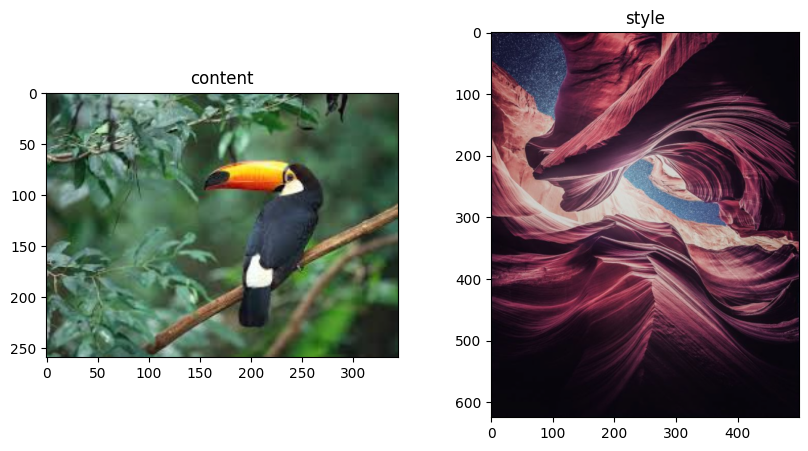

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('content')
ax1.imshow(content_d)

ax2.set_title('style')
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [ ]:
def get_features(image, model):
  layers = {
      '0' : 'conv1_1',
      '5' : 'conv2_1',
      '10' : 'conv3_1',
      '19' : 'conv4_1',
      '21' : 'conv4_2',
      '28' : 'conv5_1'
  }

  x = image
  features = {}
  for name, layer in model._modules.items():
    x = layer(x)

    if name in layers:
      features[layers[name]] = x
  return features

In [ ]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)
'''
content_f = content_f.to(device)
style_f = style_f.to(device)

print("Content Shape ", content_f.shape)
print("Style Shape ", style_f.shape)
'''

'\ncontent_f = content_f.to(device)\nstyle_f = style_f.to(device)\n\nprint("Content Shape ", content_f.shape)\nprint("Style Shape ", style_f.shape)\n'

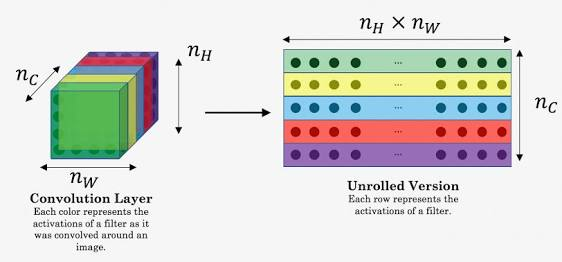

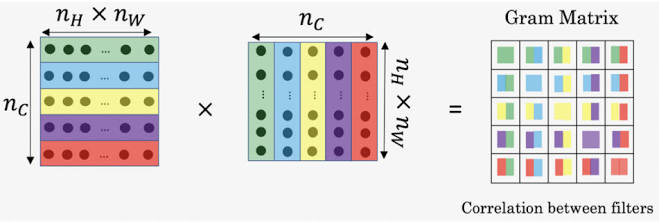

In [ ]:
# creating style gram matrix
def gram_matrix(tensor):

  b,c,h,w = tensor.size()
  tensor = tensor.view(c, h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [ ]:
style_grams = {layer : gram_matrix(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [ ]:
def content_loss (taget_conv4_2, content_conv4_2):
  loss = torch.mean((taget_conv4_2 - content_conv4_2)**2)
  return loss

In [ ]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [ ]:
def style_loss (style_weights, target_features, style_grams):
  loss = 0
  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b,c,h,w = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram) ** 2)
    loss += layer_loss / (c*h*w)
  return loss

In [ ]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target,vgg)
print("Content Loss : ", content_loss(target_f['conv4_2'], content_f['conv4_2']))
print('Style Loss : ', style_loss(style_weights, target_f, style_grams))

Content Loss :  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss :  tensor(1919.0450, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [ ]:
from torch import optim
optimizer = optim.Adam([target], lr = 0.003)
# setting up hyperparameters
alpha = 1
beta = 1e5

epochs = 3000
show_every = 500

In [ ]:
def total_loss (c_loss, s_loss, alpha, beta):
  total_loss = alpha * c_loss + beta * s_loss
  return total_loss

In [ ]:
results = []

for i in range(epochs):
  target_f = get_features(target, vgg)

  c_loss = content_loss (target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss (c_loss, s_loss, alpha, beta)

  optimizer.zero_grad() #updates the learnable weights of the model
  t_loss.backward()
  optimizer.step() # updates the parameters

  #print result at every 500 steps
  if i % show_every == 0:
    print("Total Loss at Epcoh {} : {}".format(i, t_loss))
    results.append(deprocess(target.detach()))

Total Loss at Epcoh 0 : 191904512.0
Total Loss at Epcoh 500 : 29397382.0
Total Loss at Epcoh 1000 : 16585840.0
Total Loss at Epcoh 1500 : 12731172.0
Total Loss at Epcoh 2000 : 10467991.0
Total Loss at Epcoh 2500 : 8961475.0


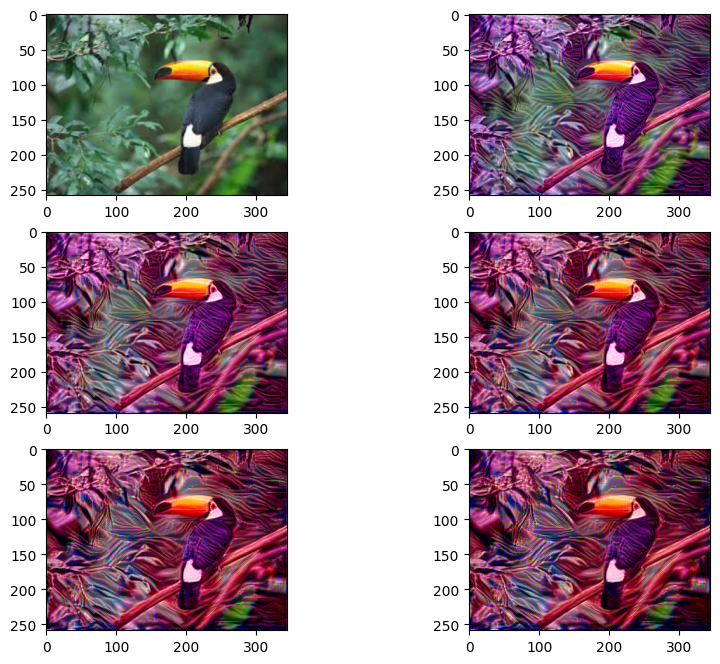

In [ ]:
plt.figure(figsize = (10,8))

for i in range(len(results)):
  plt.subplot(3,2,i+1)
  plt.imshow(results[i])
plt.show()

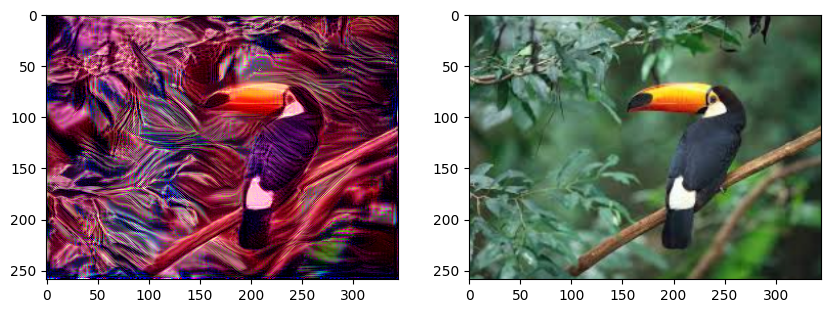

In [ ]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)